In [62]:
import requests
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup, SoupStrainer
from bs4.element import Comment
from datetime import datetime
from unicodedata import normalize
import httplib2
import time

str_to_datetime = lambda var: datetime.strptime(var, '%B %d, %Y, %H:%M:%S %p')

In [133]:
def gather_links(response):
    """
    Returns a list of links observed within the response input
    """
    links = []
    
    for link in BeautifulSoup(response.content, parse_only=SoupStrainer('a')):
        try:
            if link.has_attr('href'):
                links.append(link['href'])
                
        except AttributeError:
            pass
    
    return links

def add_root(links, url):
    for idx, link in enumerate(links):
        if 'http' not in link:
            links[idx] = url + link
    
    return links

def drop_external_links(links, url):
    for idx, link in enumerate(links):
        if url not in link:
            links.remove(link)
            
    return links

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

remove_special_chars = lambda string: re.sub(r"[^a-zA-Z0-9]+", ' ', string)

In [140]:
url = 'https://www.coindesk.com/'
starting_time = time.time()
current_time  = time.time()
time_elapsed  = current_time - starting_time

non_analyzed_links = set()
analyzed_links = set()

non_analyzed_links.add(url)

while non_analyzed_links != {} and time_elapsed < 30:
    
    local_url = non_analyzed_links.pop()
    response = requests.get(local_url)
    
    ## Assess that we recieved a response
    
    if not response.ok:
        print('Error recieving a response')
    
    ## Gather and classify the links observed in the response
    
    links = gather_links(response)
    links = add_root(links, url)
    links = drop_external_links(links, url)
    
    for link in links:
        if link in analyzed_links:
            continue
        else:
            non_analyzed_links.add(link)
            
    del links
    
    ## Gather and save the content observed within the response
    
    soup = BeautifulSoup(response.content, "html.parser")
    
    texts = soup.findAll(text=True)
    visible_texts_bis = list(filter(tag_visible, texts)).copy()
    visible_texts_bis = map(remove_special_chars, visible_texts_bis)
    visible_texts = []
    [visible_texts.append(x) for x in visible_texts_bis if x not in visible_texts]
    visible_texts = np.array(visible_texts)

    chars = map(lambda x: len(x), visible_texts)
    chars = np.fromiter(chars, dtype=int)
    thershold = np.quantile(chars, q = 0.8)
    visible_texts = visible_texts[chars > thershold]
    
    ## Save data
    
    local_url = local_url.replace('/','-')
    filename = f'Data/{local_url}.npy'
    np.save(filename, visible_texts)
    
    ## updates for the next iteration
    
    current_time  = time.time()
    time_elapsed  = current_time - starting_time

In [139]:
local_url.replace('/','-')

'https:--www.coindesk.com-'

In [10]:
url = 'https://www.coindesk.com/markets/2024/04/23/bitcoins-post-halving-demand-to-be-5x-greater-than-supply-bitfinex-estimates'
response = requests.get(url)

In [11]:
soup = BeautifulSoup(response.content, "html.parser")

In [126]:
texts = soup.findAll(text=True)
visible_texts_bis = list(filter(tag_visible, texts)).copy()
visible_texts_bis = map(remove_special_chars, visible_texts_bis)
visible_texts = []
[visible_texts.append(x) for x in visible_texts_bis if x not in visible_texts]
visible_texts = np.array(visible_texts)

chars = map(lambda x: len(x), visible_texts)
chars = np.fromiter(chars, dtype=int)
thershold = np.quantile(chars, q = 0.8)
visible_texts = visible_texts[chars > thershold]

In [128]:
np.save('test_save.npy', visible_texts)

In [141]:
a = np.load('Data/https:--www.coindesk.com--tag-token-governance-.npy')

In [142]:
a

array(['300 Top Thought Leaders Confirmed to Speak at Consensus',
       'Bitcoin Could See Real All Time High for This Cycle in Q3 or Q4 Delta Blockchain Fund Founder',
       'Akash Network s Token Surges Nearly 50 on Upbit Listing',
       'Bitcoin s 200 Day Average Nearing Record High Ripple Rejects SEC s Ask of 1 95B Fine',
       'Meme Coin Life Cycle Is Five Days Delta Blockchain Fund Founder Says',
       'Probing the intersection of crypto and government ',
       'News and analysis for the professional investor ',
       'What financial advisors need to know about crypto ',
       'By signing up you will receive emails about CoinDesk products and you agree to our',
       'Why The Bitcoin Halving Matters With Alex Gladstein and Diverter',
       'Dapper Labs Playbook Ridhima Kahn on NBA Top Shot and Virtual Influencers',
       'Rootstock Bringing the Ethereum Virtual Machine to Bitcoin',
       'How to Build the Infrastructure of Web3 With Decentralized Data and Services',
 

In [127]:
visible_texts

array(['300 Top Thought Leaders Confirmed to Speak at Consensus',
       '21Shares Exec on Consumer Facing Applications Powered by Blockchain',
       '21Shares Exec on Aftermath of the Halving Future of Bitcoin Network',
       'Bitcoin Transaction Fees Slide Significantly Post Halving',
       'Binance Exec s Wife Denies Extradition Report Thailand Tightens Crypto Regulation',
       'Probing the intersection of crypto and government ',
       'What financial advisors need to know about crypto ',
       'By signing up you will receive emails about CoinDesk products and you agree to our',
       'Why The Bitcoin Halving Matters With Alex Gladstein and Diverter',
       'Dapper Labs Playbook Ridhima Kahn on NBA Top Shot and Virtual Influencers',
       'Rootstock Bringing the Ethereum Virtual Machine to Bitcoin',
       'How to Build the Infrastructure of Web3 With Decentralized Data and Services',
       'Crypto for Advisors Beyond Bitcoin Crypto Indices',
       'First Mover Americas

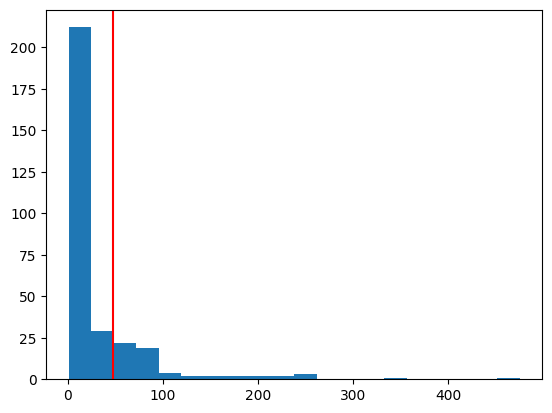

In [96]:
plt.hist(chars, bins = 20)
plt.axvline(thershold, color = 'r')
plt.show()

In [101]:
soup.find_all('span', class_='typography__StyledTypography-sc-owin6q-0 iOUkmj')

[<span class="typography__StyledTypography-sc-owin6q-0 iOUkmj">Apr 23, 2024 at 7:22 a.m. UTC</span>,
 <span class="typography__StyledTypography-sc-owin6q-0 iOUkmj">Water, pipes. (analogicus/Pixabay)</span>,
 <span class="typography__StyledTypography-sc-owin6q-0 iOUkmj">The daily coin issuance has slowed after halving. (Glassnode) (Glassnode)</span>]

In [68]:
chars

In [34]:
u" ".join(t.strip() for t in visible_texts)

''

In [25]:
soup.findAll(text = True)[0].parent.name

'[document]'

In [22]:
print(soup.findAll(text = True))

['html', 'APP_ENV = "production";', 'window.googletag = window.googletag || {cmd: []};', '(function googleConsent(onLoadPageData, ID, AUTH, ENV) {window.dataLayer = window.dataLayer || [onLoadPageData];function gtag() {window.dataLayer.push(arguments);}window["gtag_enable_tcf_support"] = true;window.gtag = gtag;gtag("consent", "default", {ad_storage: "granted",analytics_storage: "granted",functionality_storage: "granted",personalization_storage: "granted",security_storage: "granted",wait_for_update: 500});gtag("set", "ads_data_redaction", false);gtag("set", "url_passthrough", true);gtag("consent", "default", {ad_storage: "denied",analytics_storage: "denied",functionality_storage: "granted",personalization_storage: "denied",security_storage: "granted",wait_for_update: 500,region: ["AT", "BE", "BG", "HR", "CY", "CZ", "DK", "EE", "FI", "FR", "DE", "GR", "HU", "IE", "IT", "LV", "LT", "LU", "MT", "NL", "PL", "PT", "RO", "SK", "SI", "ES", "SE", "GB"]});(function (w, d, s, l, i) {w[l] = w[l] 

In [8]:
print(soup)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [89]:
print(soup.prettify())

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [40]:
response = requests.get(url)

# soup = BeautifulSoup(response.content, "html.parser")
# link = BeautifulSoup(response.content, parse_only=SoupStrainer('a'))

# http = httplib2.Http()
# status, response = http.request(url)

In [52]:
for link in BeautifulSoup(response.content, parse_only=SoupStrainer('a')):
    try:
        if link.has_attr('href'):
            if 'http' in link['href']:
                print(link['href'])
            else:
                print(url + link['href'])
    except AttributeError:
        pass

https://www.coindesk.com//data/
https://www.coindesk.com//indices/cd20/
https://www.coindesk.com//tv/
https://www.coindesk.com//newsletters/
https://www.coindesk.com//podcasts/
https://www.coindesk.com//consensus-magazine/
https://www.coindesk.com//learn/
https://www.coindesk.com//calculator/
https://www.coindesk.com//events/
https://www.coindesk.com//webinars/
https://www.coindesk.com//indices
https://www.coindesk.com//about/
https://www.coindesk.com//markets/
https://www.coindesk.com//business/
https://www.coindesk.com//bitcoin-halving/
https://www.coindesk.com//tech/2024/04/18/protocol-village/
https://www.coindesk.com//policy/
https://www.coindesk.com//coindeskstudios
https://consensus2024.coindesk.com/speakers/
https://www.coindesk.com//tv/
https://www.coindesk.com//tv/first-mover/
https://www.coindesk.com//tv/the-hash/
https://www.coindesk.com//tv/all-about-bitcoin/
https://www.coindesk.com//tv/money-reimagined/
https://www.coindesk.com//tv/community-crypto/
https://www.coindesk.

In [53]:
url = 'https://www.coindesk.com/markets/2024/04/23/bitcoins-post-halving-demand-to-be-5x-greater-than-supply-bitfinex-estimates/'
response = requests.get(url)

for link in BeautifulSoup(response.content, parse_only=SoupStrainer('a')):
    try:
        if link.has_attr('href'):
            print(link['href'])
            
    except AttributeError:
        pass

/data/
/indices/cd20/
/tv/
/newsletters/
/podcasts/
/consensus-magazine/
/learn/
/calculator/
/events/
/webinars/
/indices
/about/
/markets/
/business/
/bitcoin-halving/
/tech/2024/04/18/protocol-village/
/policy/
/coindeskstudios
https://consensus2024.coindesk.com/speakers/
/tv/
/tv/first-mover/
/tv/the-hash/
/tv/all-about-bitcoin/
/tv/money-reimagined/
/tv/community-crypto/
/tv/
/video/21shares-exec-on-consumer-facing-applications-powered-by-blockchain/
/video/21shares-exec-on-consumer-facing-applications-powered-by-blockchain/
/video/21shares-exec-on-aftermath-of-the-halving-future-of-bitcoin-network/
/video/21shares-exec-on-aftermath-of-the-halving-future-of-bitcoin-network/
/video/bitcoin-transaction-fees-slide-significantly-post-halving/
/video/bitcoin-transaction-fees-slide-significantly-post-halving/
/video/binance-execs-wife-denies-extradition-report-thailand-tightens-crypto-regulation/
/video/binance-execs-wife-denies-extradition-report-thailand-tightens-crypto-regulation/
/n